### Weekly assignment week 41
Bjørnstad, Johannessen, and Merlid

In [1]:
import jax.numpy as jnp
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from data_gen import DataGen, Poly1D2Deg
from grad_desc import Model
from plotting import Plotting 

In [2]:
np.random.seed(42)

In [3]:
data = Poly1D2Deg(1000)

In [4]:
def tune_eta(model_type: str = "OLS", tpe: str = "Constant", batch_size: int = 0, epochs: int = 10000) -> float:
    
    etas = [0.01, 0.05, 0.08, 0.1] 
    best_eta = etas[0]
    best_loss = 1e5

    for e in etas:
        model = Model(data, model_type = model_type)
        model.set_custom_initial_val(jnp.ones((3,1)))
        model.gradient_descent(eta = e, tpe = tpe, batch_size = batch_size, epochs = epochs) 
        loss = model.MSE_list[-1]
        if loss < best_loss:
            best_loss = loss
            best_eta = e

    #print(f"Best eta: {best_eta}, Best loss: {best_loss}")
    return best_eta, best_loss

In [5]:
model_types = ["OLS", "Ridge"]
tpe = ["Constant", "Momentum", "Adagrad", "Adagrad_Momentum", "Adam", "RMSprop"]
# tpe = ["Adam"]
batch_sizes = [100, 1000]
epochs = 200


for model_type in model_types:
    
    best_params_model = {}
    best_loss_model = 1e10
    best_tpe_model = ""
    best_batch_size_model = 0
    best_eta_model = 0

    for t in tpe:
        print(model_type, t)
        best_params_tpe = {}
        best_loss = 1e5
        best_tpe = ""
        best_batch_size = 0
        best_eta = 0

        for batch_size in batch_sizes:
            best_eta, loss = tune_eta(model_type = model_type, tpe = t, batch_size = batch_size, epochs = epochs)
            if loss < best_loss:
                best_loss = loss
                best_tpe = t
                best_batch_size = batch_size
                best_eta = best_eta

        best_params_tpe["eta"] = best_eta
        best_params_tpe["loss"] = best_loss
        best_params_tpe["batch_size"] = best_batch_size

        if best_loss < best_loss_model:
            best_loss_model = best_loss
            best_tpe_model = best_tpe
            best_batch_size_model = best_batch_size
            best_eta_model = best_eta

        best_params_model[best_tpe] = best_params_tpe

    print(f"Model: {model_type}")
    



OLS Constant
OLS Momentum
OLS Adagrad
OLS Adagrad_Momentum
OLS Adam
OLS RMSprop
Model: OLS
Ridge Constant
Ridge Momentum
Ridge Adagrad
Ridge Adagrad_Momentum
Ridge Adam
Ridge RMSprop
Model: Ridge


In [6]:
best_params_model

{'Constant': {'eta': 0.01,
  'loss': Array(0.1724829, dtype=float32),
  'batch_size': 100},
 'Momentum': {'eta': 0.01,
  'loss': Array(0.17414585, dtype=float32),
  'batch_size': 1000},
 'Adagrad': {'eta': 0.1,
  'loss': Array(0.1773375, dtype=float32),
  'batch_size': 100},
 'Adagrad_Momentum': {'eta': 0.1,
  'loss': Array(0.13076007, dtype=float32),
  'batch_size': 1000},
 'Adam': {'eta': 0.08,
  'loss': Array(0.15844591, dtype=float32),
  'batch_size': 100},
 'RMSprop': {'eta': 0.08,
  'loss': Array(0.14359196, dtype=float32),
  'batch_size': 1000}}

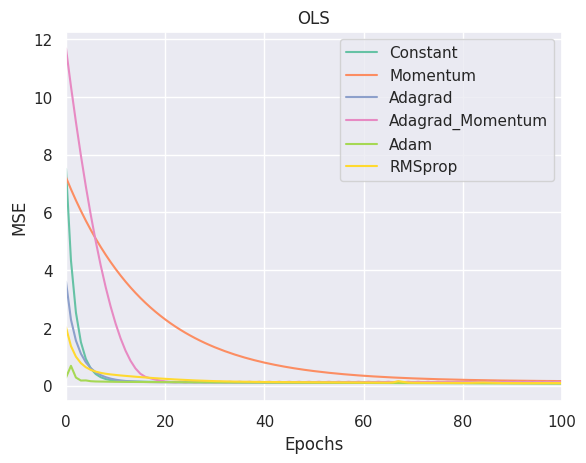

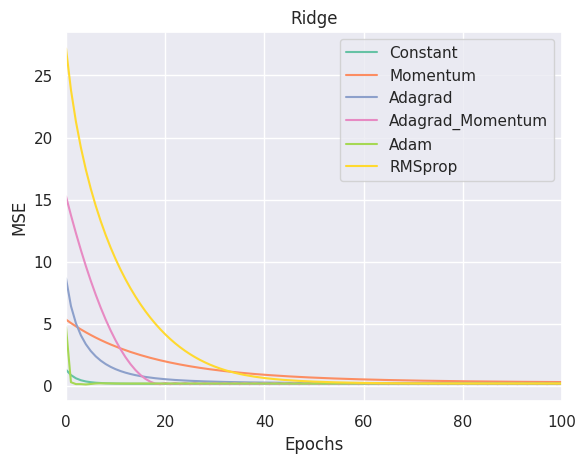

In [7]:
# plot for the best: 

for model_type in model_types:
    for t in tpe: 
        model = Model(data, model_type = model_type)
        model.gradient_descent(eta = best_params_model[t]["eta"], tpe = t, batch_size = best_params_model[t]["batch_size"], epochs = epochs)

        plots = Plotting(model)
        plots.plot_loss(xlim=100, label = t)
        plt.title(f"{model_type}")
    plt.show()

We see that Adam converges substantially slower than the other methods. This could be due to us only tuning the parameter $\eta$, and not any of the other prameters in the more complex learning rates.

The constant learning rate seems to perform suprisingly well. Note however that the plot might be somewhat misleading as the optimizers starts from different random locations. Running each model more times, with a new randomized initial position each time, would give a more represenative result. We will consider this for the final delivery of project 2.

In [4]:
model = Model(data, model_type = "OLS")
model.set_custom_initial_val(jnp.ones((3,1)))
%timeit model.gradient_descent(eta = 0.05, tpe = "Adam", batch_size = 100, epochs = 200)

2.5 s ± 6.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
model = Model(data, model_type = "OLS")
model.set_custom_initial_val(jnp.ones((3,1)))
%timeit model.gradient_descent(eta = 0.05, tpe = "Adam", batch_size = 100, epochs = 200)

2.82 s ± 57.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
